# Part 1 - Exploratory Data Analysis

### Section 1 : Data Wrangling

####  1.1 Understanding Dataset Description

In [1]:
# special library
import dataframe_image as dfi

In [2]:
# import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [3]:
# read the csv file
df = pd.read_csv("Life Expectancy Data.csv")

# show first five rows
df.head(30)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
# how many columns are there?
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<b>Note:</b> We can see that the column titles are not clean at all, so we deal with this issue first.

In [5]:
# rename each variable's name to make it easier to use for later analysis
original_cols = list(df.columns)
new_cols = [col.strip().replace(" ", "_").lower() for col in original_cols]
df.columns = new_cols

In [6]:
# check our new columns'names
new_cols

['country',
 'year',
 'status',
 'life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under-five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv/aids',
 'gdp',
 'population',
 'thinness__1-19_years',
 'thinness_5-9_years',
 'income_composition_of_resources',
 'schooling']

In [7]:
# change thiness__1-19_years to thiness_10-19_years for an accuracy
df.rename(columns={"thinness__1-19_years":"thinness_10-19_years"}, inplace=True)

In [8]:
#df.head(30)

#### 1.2 Dealing With Missing Values (Both Implicit and Explicit Ones)

In [9]:
df.describe().iloc[:, 1:].T

,count,mean,std,min,25%,50%,75%,max
life_expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
adult_mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant_deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage_expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
hepatitis_b,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
bmi,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five_deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03
polio,2919.0,8.255019e+01,2.342805e+01,3.00000,78.000000,9.300000e+01,9.700000e+01,9.900000e+01


At first glance, there five things that does not make sense from the above table.
- Adult marotality of 1? This is the same for Under Five Deaths
- Infant dealths of 0 (zero death out of 1000 infants)?
- BMI as lowest as 1 and as highest as 87.3?
- GDP per capita as low as 1.68 (USD)?
- Population of 34 for an entire country?

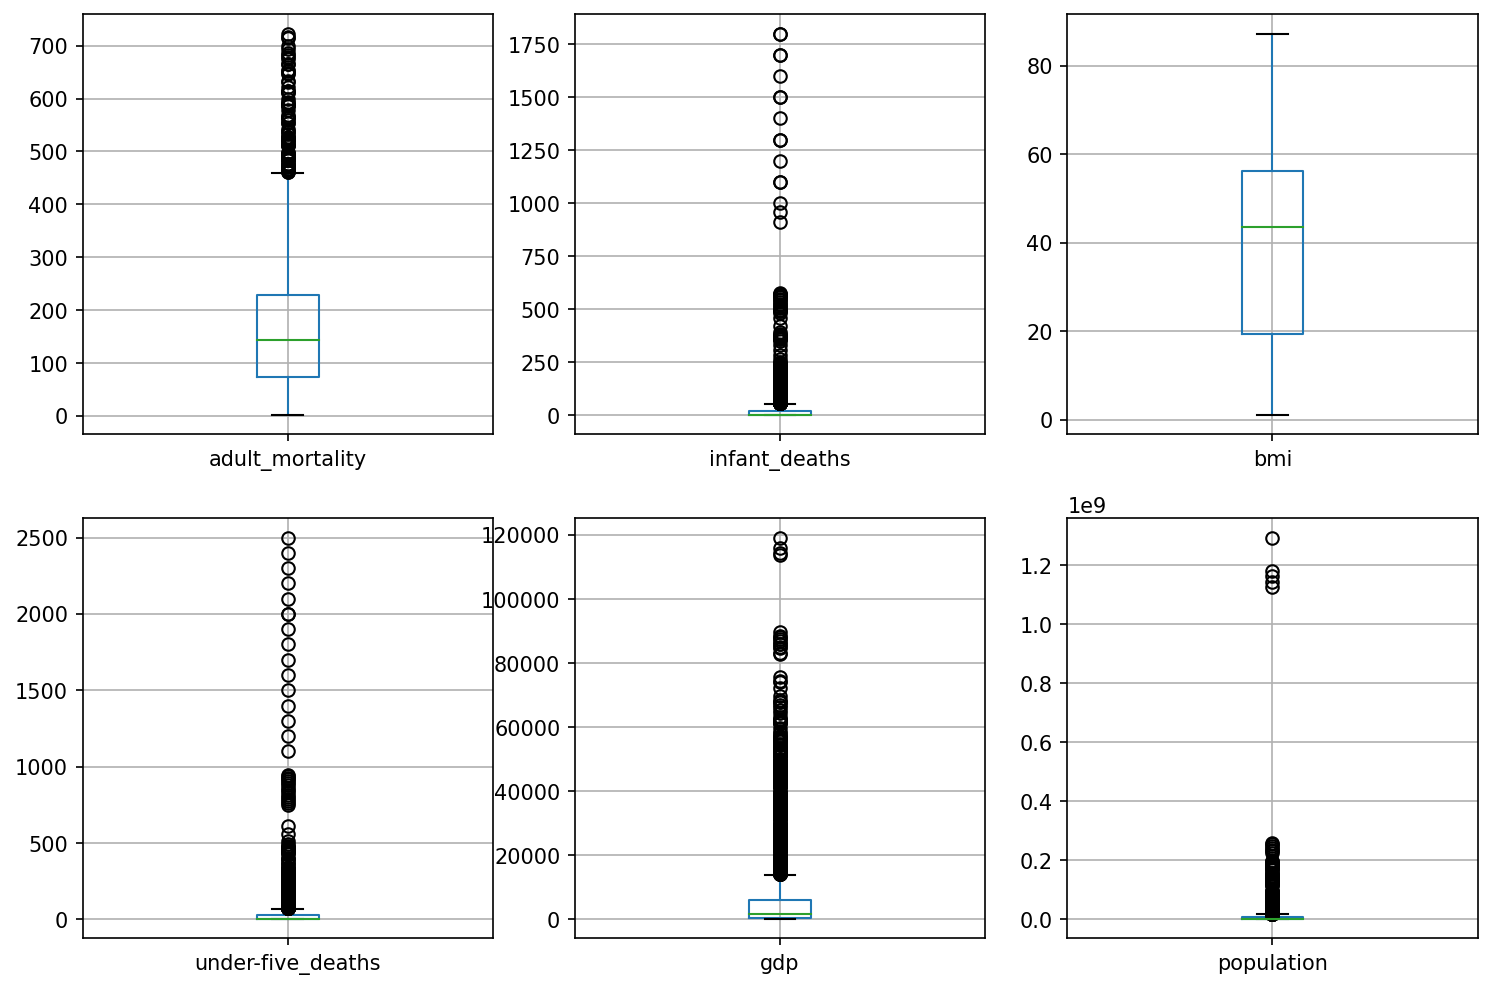

In [10]:
# visualising those outliers
plt.figure(figsize=(12,8), dpi=150)
for i, col in enumerate(["adult_mortality", "infant_deaths", 
                         "bmi", "under-five_deaths", "gdp", "population"], 
                        start=1):
    plt.subplot(2, 3, i)
    df.boxplot(col)
plt.savefig("[3]_outliers_detection_1")

After looking at the above figures, changes to null will be made for the following:
- Adult mortality rates lower than the 5th percentile
- Infant deaths of 0
- BMI less than 10 and greater than 50
- Under Five deaths of 0

In [11]:
mort_5_percentile = np.percentile(df.adult_mortality.dropna(), 5)
df.adult_mortality = df.apply(lambda x:np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)
df.infant_deaths = df.infant_deaths.replace(0, np.nan)
df.bmi = df.apply(lambda x:np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)
df["under-five_deaths"] = df["under-five_deaths"].replace(0, np.nan)

In [12]:
def nulls_breakdown(df=df):
    
    df_cols = list(df.columns)
    cols_total_count = len(df_cols)
    cols_count = 0
    data = {"number of null values":[], "proportion of null values":[]}
    
    for col in df_cols:
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        
        if null_count > 0:
            cols_count += 1
        
        #a dictionary to keep the result
        data["number of null values"].append(null_count)
        data["proportion of null values"].append(str(percent_null) + "%")
        
    print(f"Out of {len(df_cols)} columns, {cols_count} column(s) has null values")
        
    return data
            

In [13]:
pd.DataFrame(data=nulls_breakdown(df), index=df.columns)

Out of 22 columns, 16 column(s) has null values


,number of null values,proportion of null values
country,0,0.0%
year,0,0.0%
status,0,0.0%
life_expectancy,10,0.34%
adult_mortality,155,5.28%
infant_deaths,848,28.86%
alcohol,194,6.6%
percentage_expenditure,0,0.0%
hepatitis_b,553,18.82%
measles,0,0.0%


In [14]:
# deal with those missing values (null values of bmi)
df.drop(columns='bmi', inplace=True)

Since proportion of null values in the columns accounts for nearly 50%, so dropping the column would be a good option.

In [15]:
#imputation by year
imputed_data = []
for year in list(df.year.unique()):
    year_data = df[df.year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
df = pd.concat(imputed_data).copy()

In [16]:
pd.DataFrame(data=nulls_breakdown(df), index=df.columns)

Out of 21 columns, 0 column(s) has null values


,number of null values,proportion of null values
country,0,0.0%
year,0,0.0%
status,0,0.0%
life_expectancy,0,0.0%
adult_mortality,0,0.0%
infant_deaths,0,0.0%
alcohol,0,0.0%
percentage_expenditure,0,0.0%
hepatitis_b,0,0.0%
measles,0,0.0%


#### 1.3 Dealing With Outliers

##### - Detecting outliers

In [17]:
#using boxplot to visualise those outliers with the data
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15,40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title(f"{col} boxplot")
        i += 1
        plt.subplot(9,4,i)
        plt.hist(data[col])
        plt.title(f"{col} histogram")
    plt.tight_layout()
    plt.show()

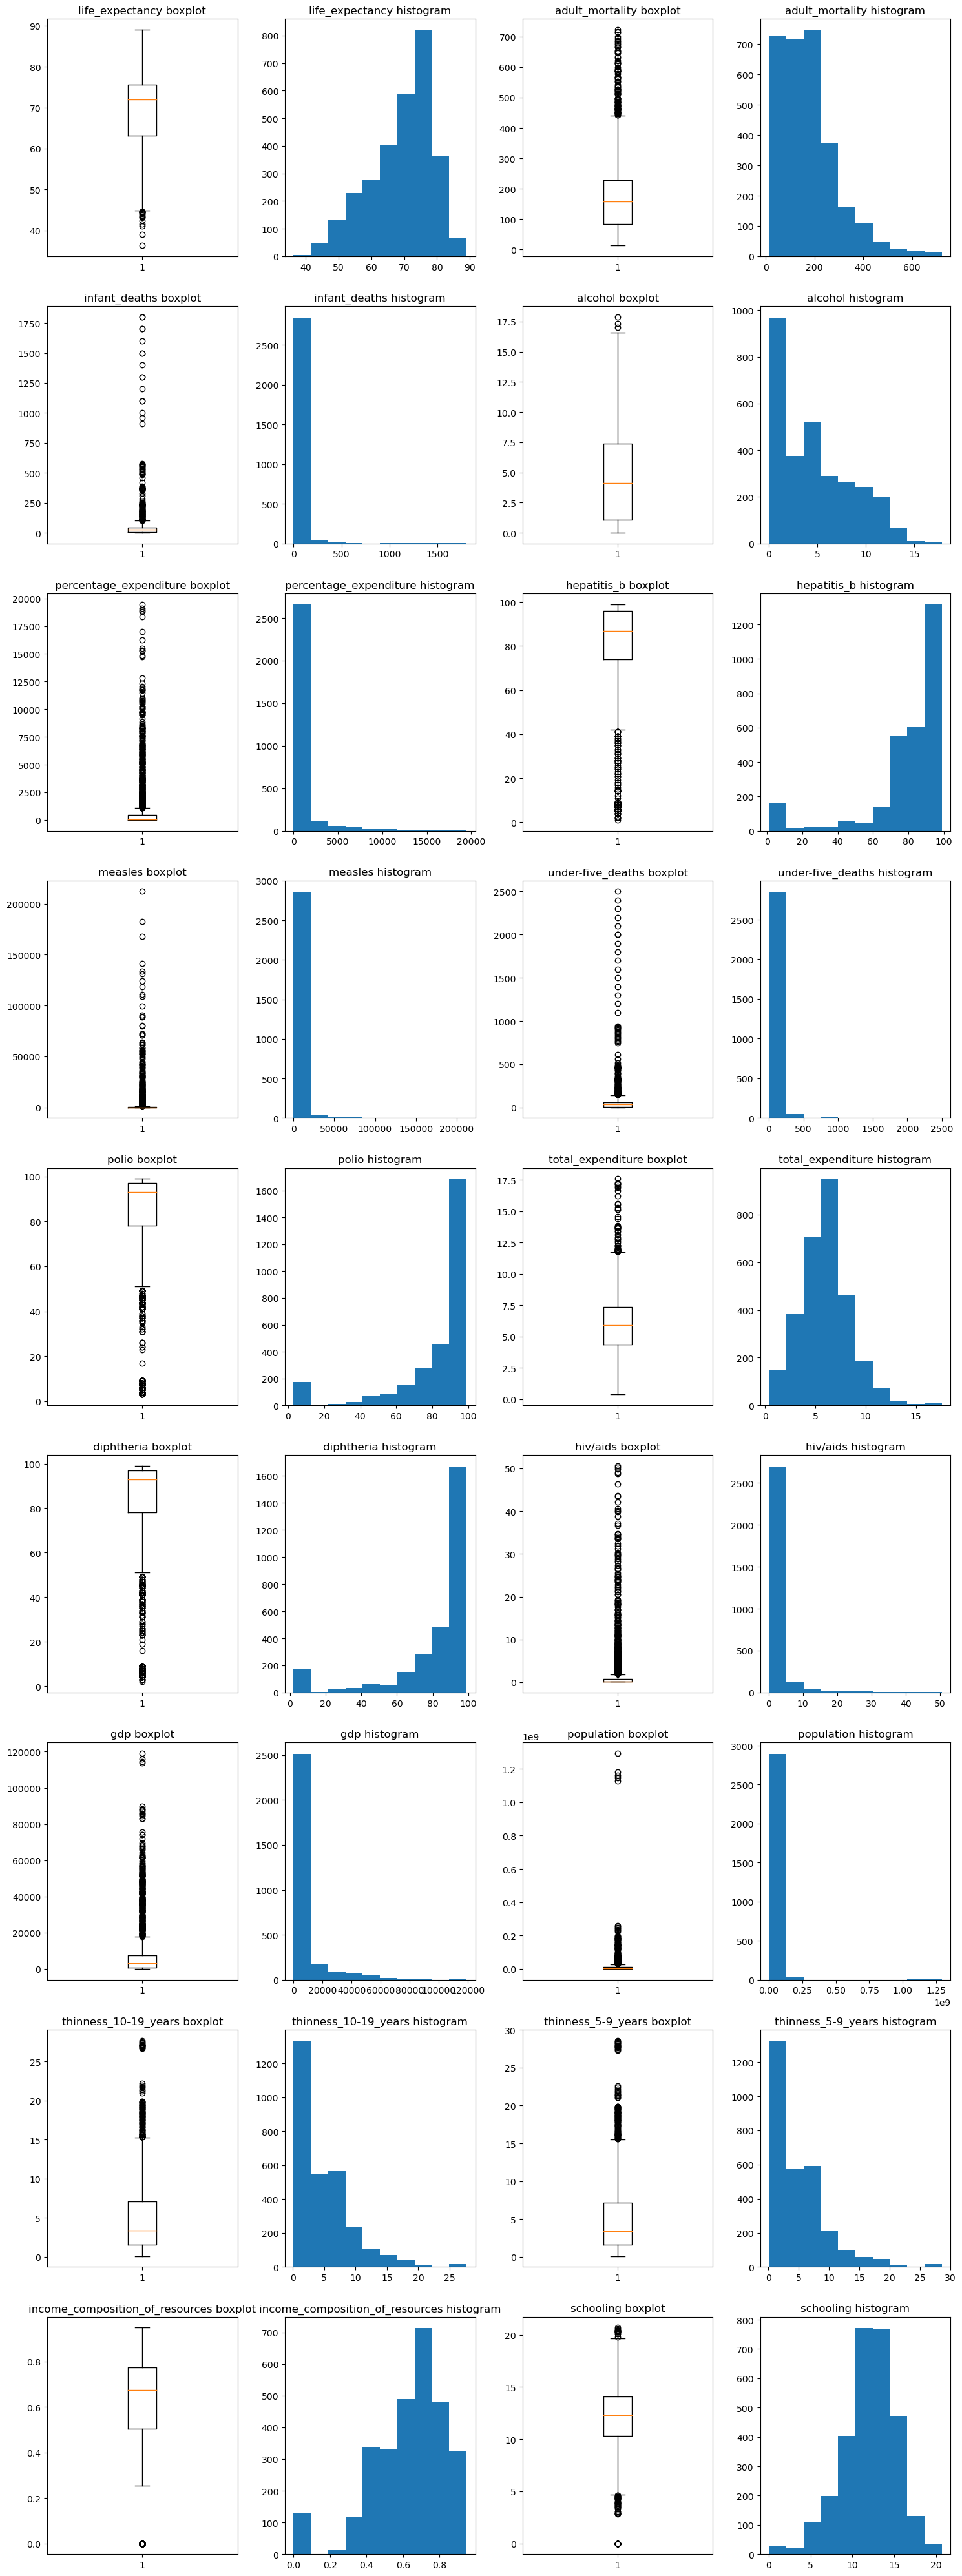

In [18]:
outliers_visual(df)

In [19]:
#Using Tukey's method to statistically analyse the data, which means anything outside 
#of 1.5 times the IQR

def outlier_count(col, data=df):
    
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    return (outlier_count, outlier_percent)
    

In [20]:
# find out how many outliers in each column

my_dict = {"#OfOutliers":[], "%OfOutliers":[]}

for col in cont_vars:
    count, percent = outlier_count(col, df)
    my_dict["#OfOutliers"].append(count)
    my_dict["%OfOutliers"].append(str(percent)+"%")
    
pd.DataFrame(data=my_dict, index=df.columns[3:])

,#OfOutliers,%OfOutliers
life_expectancy,17,0.58%
adult_mortality,97,3.3%
infant_deaths,135,4.59%
alcohol,3,0.1%
percentage_expenditure,389,13.24%
hepatitis_b,222,7.56%
measles,542,18.45%
under-five_deaths,142,4.83%
polio,279,9.5%
total_expenditure,51,1.74%


##### - Eliminating those outliers using winsorization

In [21]:
# a function to perform winsorization

def test_wins(col, lower_limit=0, upper_limit=0):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    return wins_data

In [22]:
# a function to visually compare data before and after winsorization
def before_after_winsor(col, lower=0, upper=0):
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.boxplot(df[col])
    plt.title('Before Winsorization')
    plt.subplot(122)
    plt.boxplot(test_wins(cont_vars[cont_vars.index(col)], lower_limit=lower, upper_limit=upper))
    plt.title('After Winsorizing')
    plt.show()

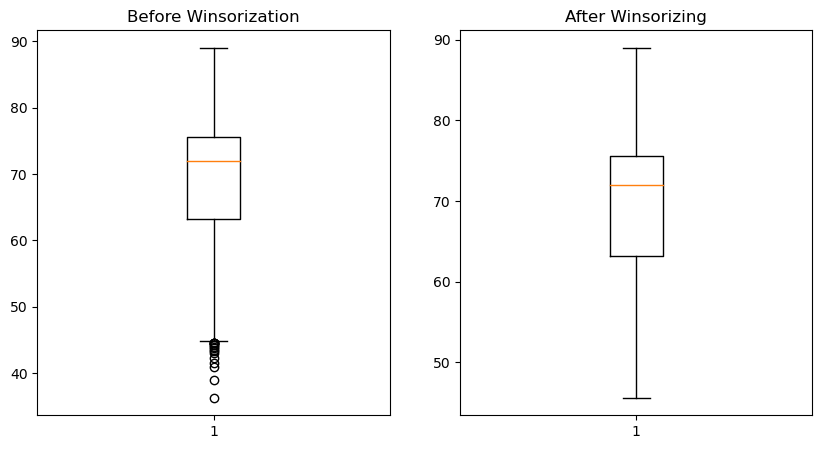

In [23]:
before_after_winsor('life_expectancy', lower=0.01)

In [24]:
# perform winsorization
wins_dict = {}

wins_dict[cont_vars[0]] = test_wins(cont_vars[0], lower_limit=0.1)
wins_dict[cont_vars[1]] = test_wins(cont_vars[1], upper_limit=0.04)
wins_dict[cont_vars[2]] = test_wins(cont_vars[2], upper_limit=0.05)
wins_dict[cont_vars[3]] = test_wins(cont_vars[3], upper_limit=0.0025)
wins_dict[cont_vars[4]] = test_wins(cont_vars[4], upper_limit=0.135)
wins_dict[cont_vars[5]] = test_wins(cont_vars[5], lower_limit=0.1)
wins_dict[cont_vars[6]] = test_wins(cont_vars[6], upper_limit=0.19)
wins_dict[cont_vars[7]] = test_wins(cont_vars[7], upper_limit=0.05)
wins_dict[cont_vars[8]] = test_wins(cont_vars[8], lower_limit=0.1)
wins_dict[cont_vars[9]] = test_wins(cont_vars[9], upper_limit=0.02)
wins_dict[cont_vars[10]] = test_wins(cont_vars[10], lower_limit=0.105)
wins_dict[cont_vars[11]] = test_wins(cont_vars[11], upper_limit=0.185)
wins_dict[cont_vars[12]] = test_wins(cont_vars[12], upper_limit=0.105)
wins_dict[cont_vars[13]] = test_wins(cont_vars[13], upper_limit=0.07)
wins_dict[cont_vars[14]] = test_wins(cont_vars[14], upper_limit=0.035)
wins_dict[cont_vars[15]] = test_wins(cont_vars[15], upper_limit=0.035)
wins_dict[cont_vars[16]] = test_wins(cont_vars[16], lower_limit=0.05)
wins_dict[cont_vars[17]] = test_wins(cont_vars[17], lower_limit=0.025, upper_limit=0.005)

Note that those limits were derived from visual analysis using those two functions which are test_wins and before_after_winsorization

In [25]:
# a new dataframe with the winsorized data
wins_df = df.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]

In [26]:
#wins_df.head()

### Section 2: Data Exploration

##### <b>Descriptive Statistics</b>

In [27]:
wins_df.describe().T

/opt/anaconda3/envs/life_expectancy/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/envs/life_expectancy/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/envs/life_expectancy/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/envs/life_expectancy/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/envs/life_expectancy/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/opt/anaconda3/envs/life_expectancy/lib/

,count,mean,std,min,25%,50%,75%,max
year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
life_expectancy,2938.0,6.968334e+01,8.604161e+00,54.80000,63.200000,7.200000e+01,7.560000e+01,8.900000e+01
adult_mortality,2938.0,1.691913e+02,1.076460e+02,13.00000,84.000000,1.570000e+02,2.270000e+02,4.280000e+02
infant_deaths,2938.0,2.860732e+01,2.569953e+01,1.00000,4.000000,2.800000e+01,4.376692e+01,9.500000e+01
alcohol,2938.0,4.640667e+00,3.910036e+00,0.01000,1.092500,4.140000e+00,7.390000e+00,1.514000e+01
percentage_expenditure,2938.0,2.815011e+02,3.841614e+02,0.00000,4.685343,6.491291e+01,4.415341e+02,1.077712e+03
hepatitis_b,2938.0,8.367129e+01,1.384893e+01,55.00000,74.099237,8.700000e+01,9.600000e+01,9.900000e+01
measles,2938.0,2.206913e+02,3.291923e+02,0.00000,0.000000,1.700000e+01,3.602500e+02,8.310000e+02
under-five_deaths,2938.0,3.864055e+01,3.773234e+01,1.00000,4.000000,3.400000e+01,6.001481e+01,1.380000e+02
polio,2938.0,8.551468e+01,1.527093e+01,52.00000,78.000000,9.300000e+01,9.700000e+01,9.900000e+01


##### <b>Correlations between all variables</b>

In [28]:
corr_matrix = wins_df[cont_vars].corr()
corr_matrix

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
life_expectancy,1.000000,-0.678151,-0.218408,0.419451,0.506713,0.315806,-0.335807,-0.293433,0.575451,0.239791,0.579593,-0.784964,0.517325,0.007491,-0.533598,-0.532317,0.805581,0.759530
adult_mortality,-0.678151,1.000000,0.119906,-0.187971,-0.293870,-0.214673,0.216200,0.168908,-0.348198,-0.121052,-0.351136,0.596271,-0.297774,-0.000562,0.332904,0.339266,-0.511340,-0.450785
infant_deaths,-0.218408,0.119906,1.000000,-0.062119,-0.094053,-0.196145,0.323610,0.966996,-0.217511,-0.086289,-0.225997,0.124310,-0.059337,0.176352,0.196669,0.202573,-0.178389,-0.191062
alcohol,0.419451,-0.187971,-0.062119,1.000000,0.378069,0.106352,-0.197193,-0.104954,0.265830,0.308434,0.272948,-0.193443,0.389598,-0.036283,-0.436755,-0.427166,0.475112,0.519757
percentage_expenditure,0.506713,-0.293870,-0.094053,0.378069,1.000000,0.122870,-0.194687,-0.131361,0.268385,0.159830,0.268411,-0.295791,0.712940,-0.070366,-0.331693,-0.333748,0.556006,0.530422
hepatitis_b,0.315806,-0.214673,-0.196145,0.106352,0.122870,1.000000,-0.266487,-0.239049,0.608008,0.071100,0.647198,-0.278977,0.172066,-0.004936,-0.134103,-0.139528,0.299493,0.290399
measles,-0.335807,0.216200,0.323610,-0.197193,-0.194687,-0.266487,1.000000,0.368517,-0.320104,-0.161737,-0.315164,0.226305,-0.183792,0.222488,0.359571,0.364201,-0.274976,-0.329274
under-five_deaths,-0.293433,0.168908,0.966996,-0.104954,-0.131361,-0.239049,0.368517,1.000000,-0.281667,-0.096826,-0.291057,0.198160,-0.102372,0.180288,0.235471,0.236927,-0.253539,-0.264996
polio,0.575451,-0.348198,-0.217511,0.265830,0.268385,0.608008,-0.320104,-0.281667,1.000000,0.164149,0.855849,-0.475611,0.309033,0.003618,-0.288660,-0.287206,0.515361,0.509788
total_expenditure,0.239791,-0.121052,-0.086289,0.308434,0.159830,0.071100,-0.161737,-0.096826,0.164149,1.000000,0.176715,-0.110629,0.146954,-0.105257,-0.285700,-0.294560,0.185535,0.259746


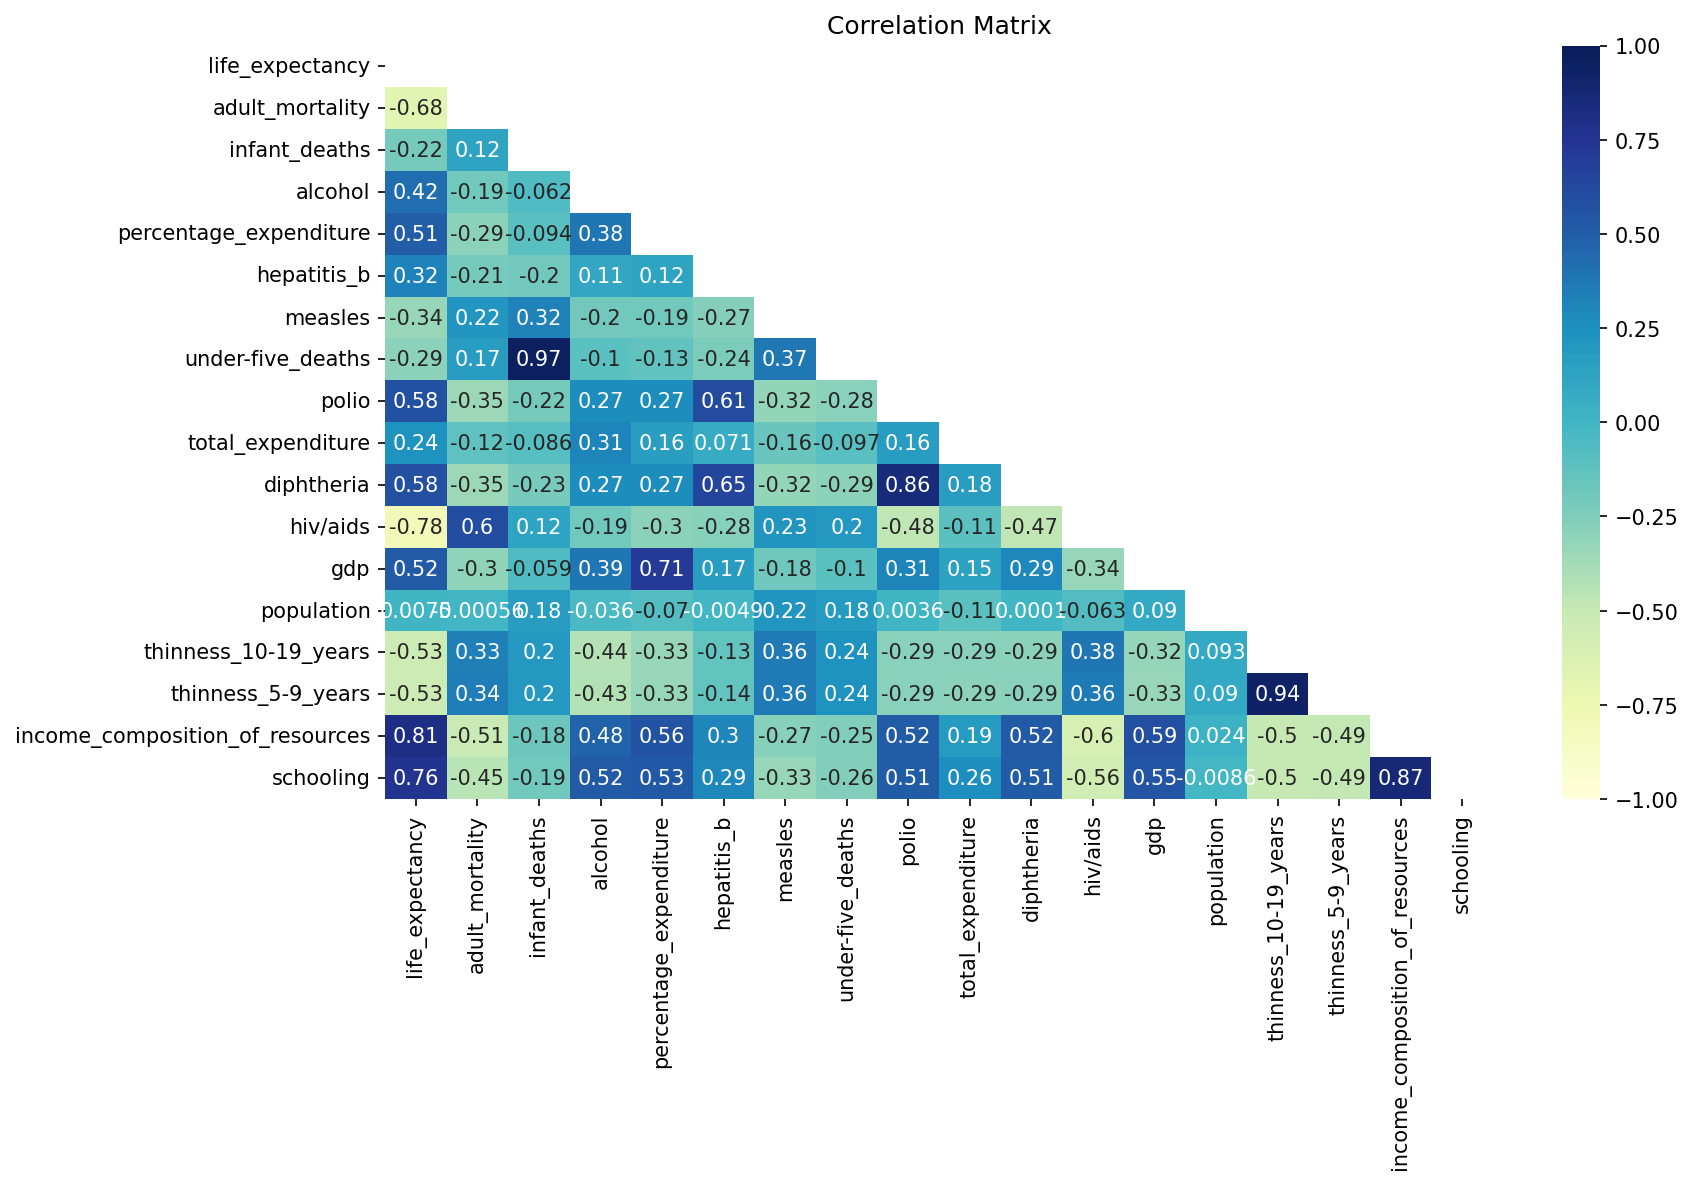

In [30]:
plt.figure(figsize=(12,8), dpi=150)
sns.heatmap(corr_matrix, annot=True, fmt='.2g', vmin=-1, 
            vmax=1, center=0, cmap='YlGnBu',
           mask=np.triu(corr_matrix))
plt.ylim(18, 0)
plt.title('Correlation Matrix')
plt.tight_layout()

#plt.savefig("corr_matrix.png", bbox_inches='tight')

Some general takeaways:
- Life Expectancy (target variable) appears to be relatively highly correlated (negatively or positively) with:
    - Adult Mortality (negative)
    - HIV/AIDS (negative)
    - Income Composition of Resources (positive)
    - Schooling (positive)
- Life expectancy (target variable) is extremely lowly correlated to population (nearly no correlation at all)
- Infant deaths and Under Five deaths are extremely highly correlated
- Percentage Expenditure and GDP are relatively highly correlated
- Income Composition of Resources and Schooling are very highly correlated

##### <b>Life expectancy trends by year (2000-2015)</b>

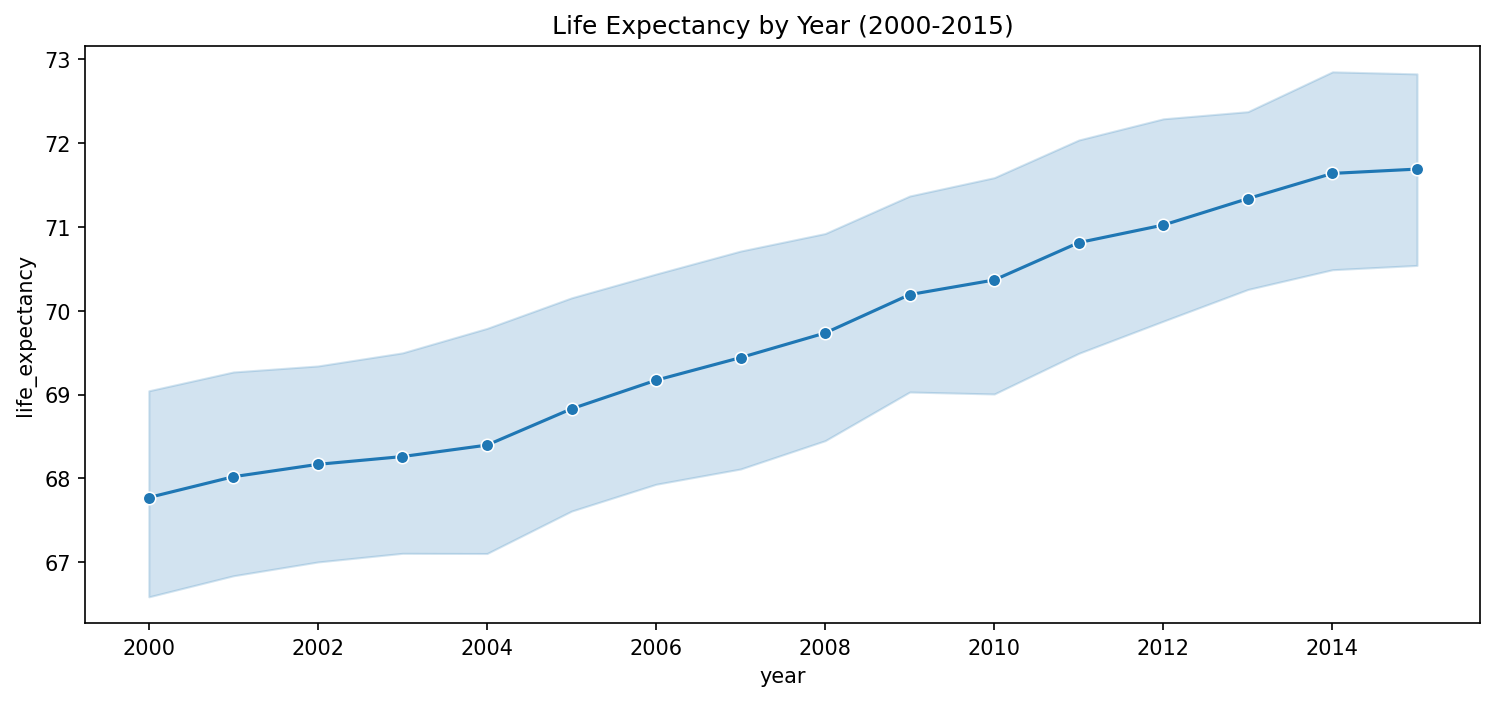

In [32]:
plt.figure(figsize=(12,5), dpi=150)
sns.lineplot(data=wins_df, x='year', y='life_expectancy', marker='o')
plt.title('Life Expectancy by Year (2000-2015)')
plt.savefig("[13]_trend_by_year.png")
plt.show()


It is clearly shown that, in general, our life expectancy has gradually increased over the period.

##### <b>Life Expectancy in years by status</b>

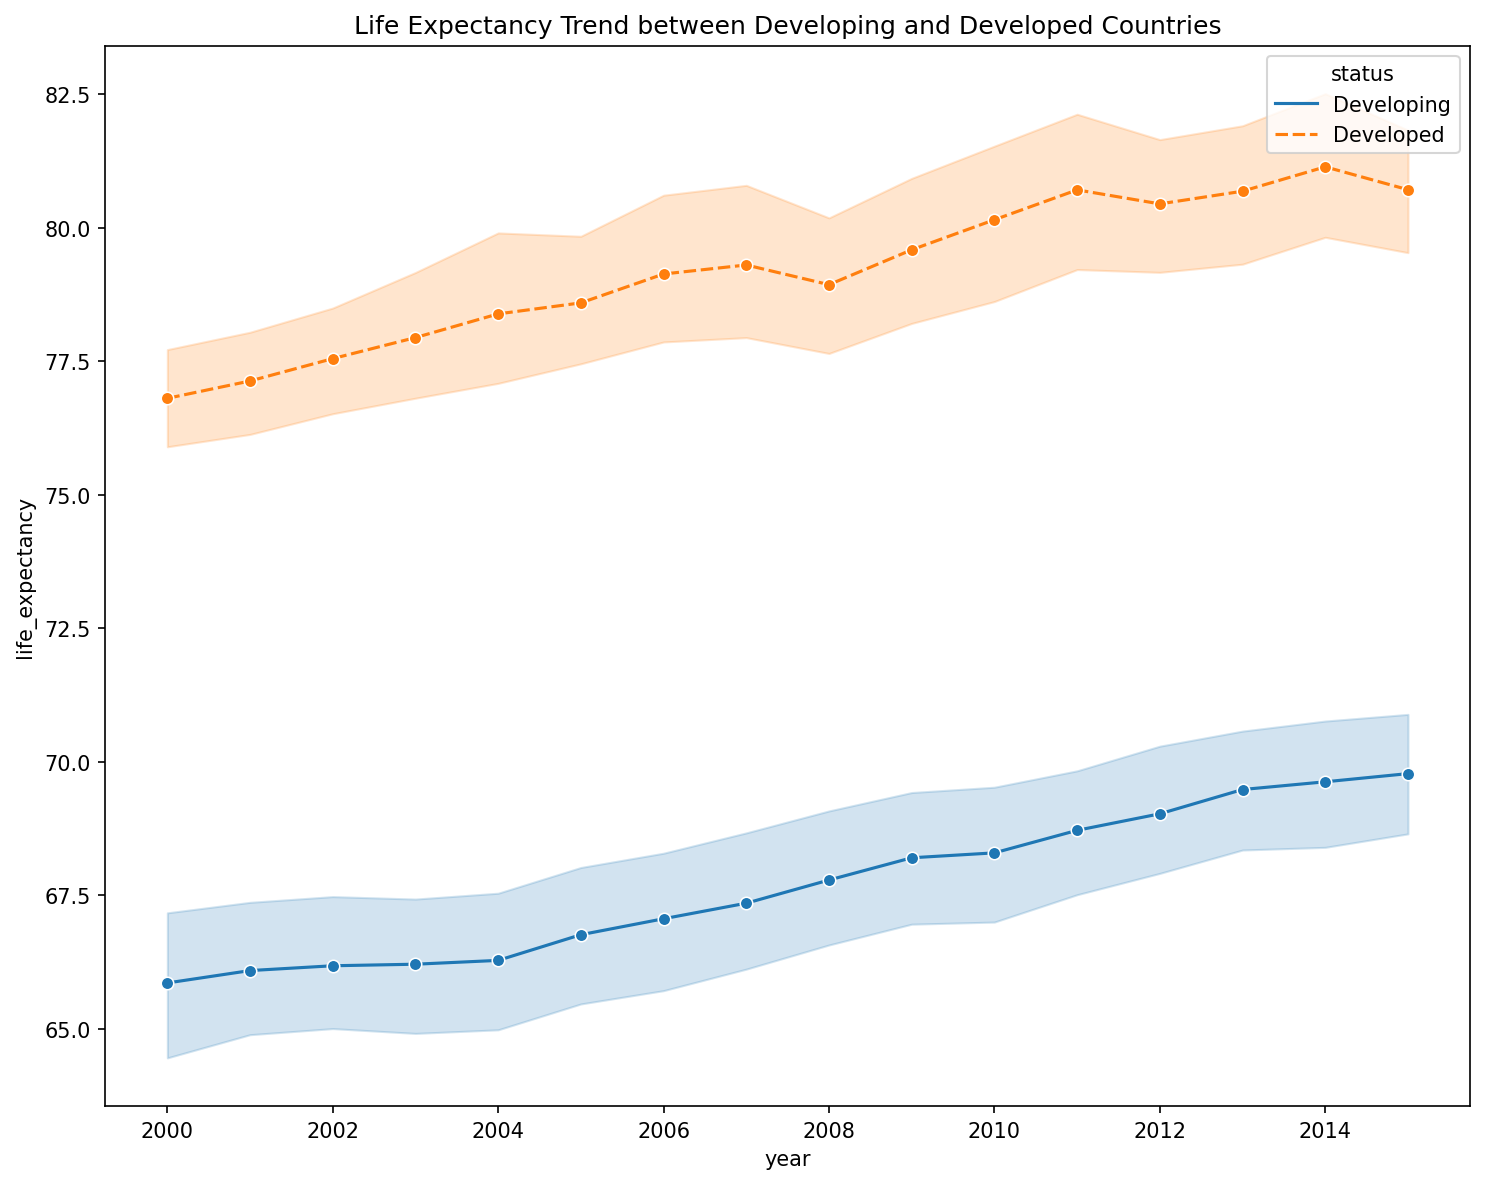

In [43]:
# a graph to compare a life expectancy trend between developed and developing countries (2000-2015)
plt.figure(figsize=(10,8), dpi=150)
sns.lineplot(x = 'year', y = 'life_expectancy', hue='status', 
             style='status', data = wins_df, marker='o')
plt.title("Life Expectancy Trend between Developing and Developed Countries")
plt.tight_layout()
plt.savefig("[14]_trend_in_year_by_status.png", bbox_inches='tight')
plt.show()

In [35]:
# average life expectancy between them
wins_df.groupby('status')['life_expectancy'].agg(['mean'])

,mean
status,
Developed,79.197852
Developing,67.675334


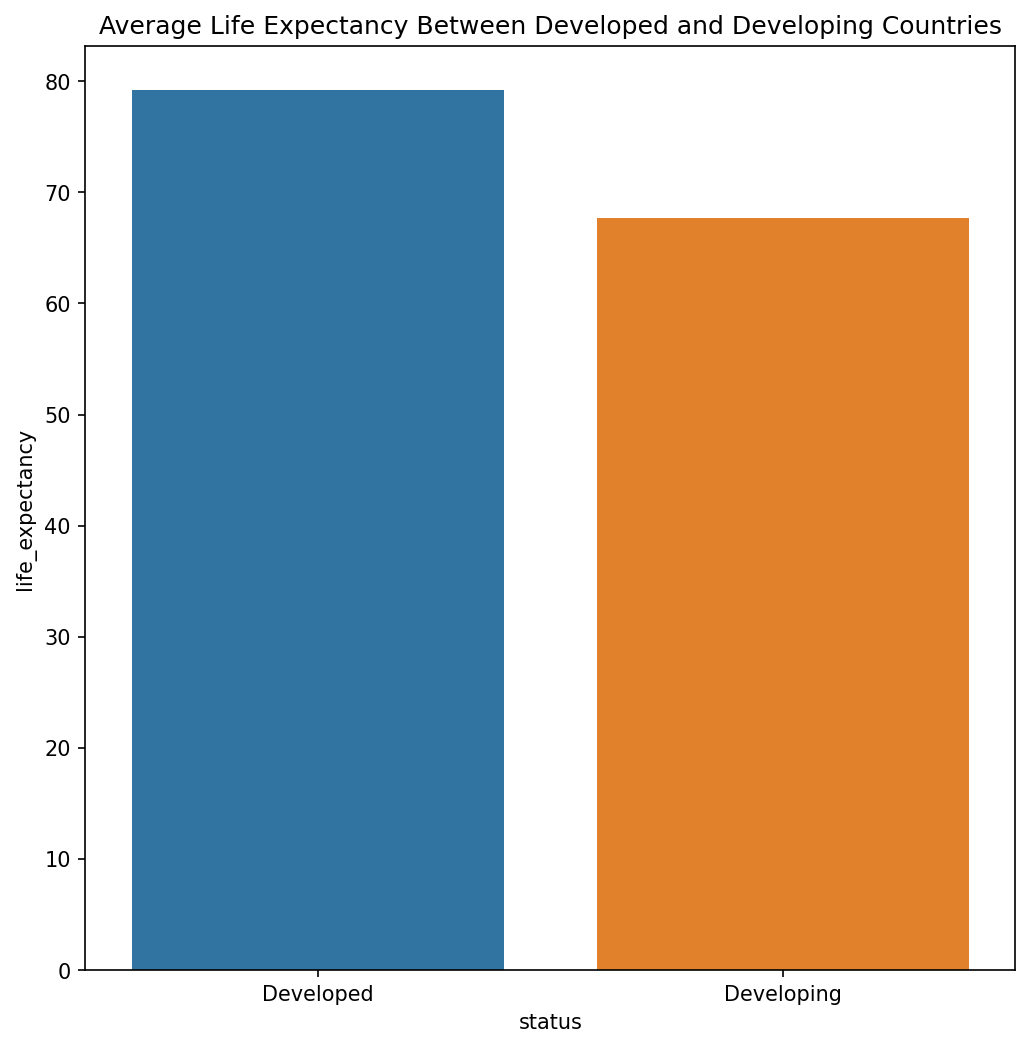

In [42]:
# visualise the averages using barplot
plt.figure(figsize=(8,8), dpi=150)
sns.barplot(x=['Developed', 'Developing'],
           y=wins_df.groupby('status')['life_expectancy'].mean())
plt.xlabel('status')
plt.title('Average Life Expectancy Between Developed and Developing Countries')
plt.show()

##### <b>General looking on life expectancy values based on regions and years<b>

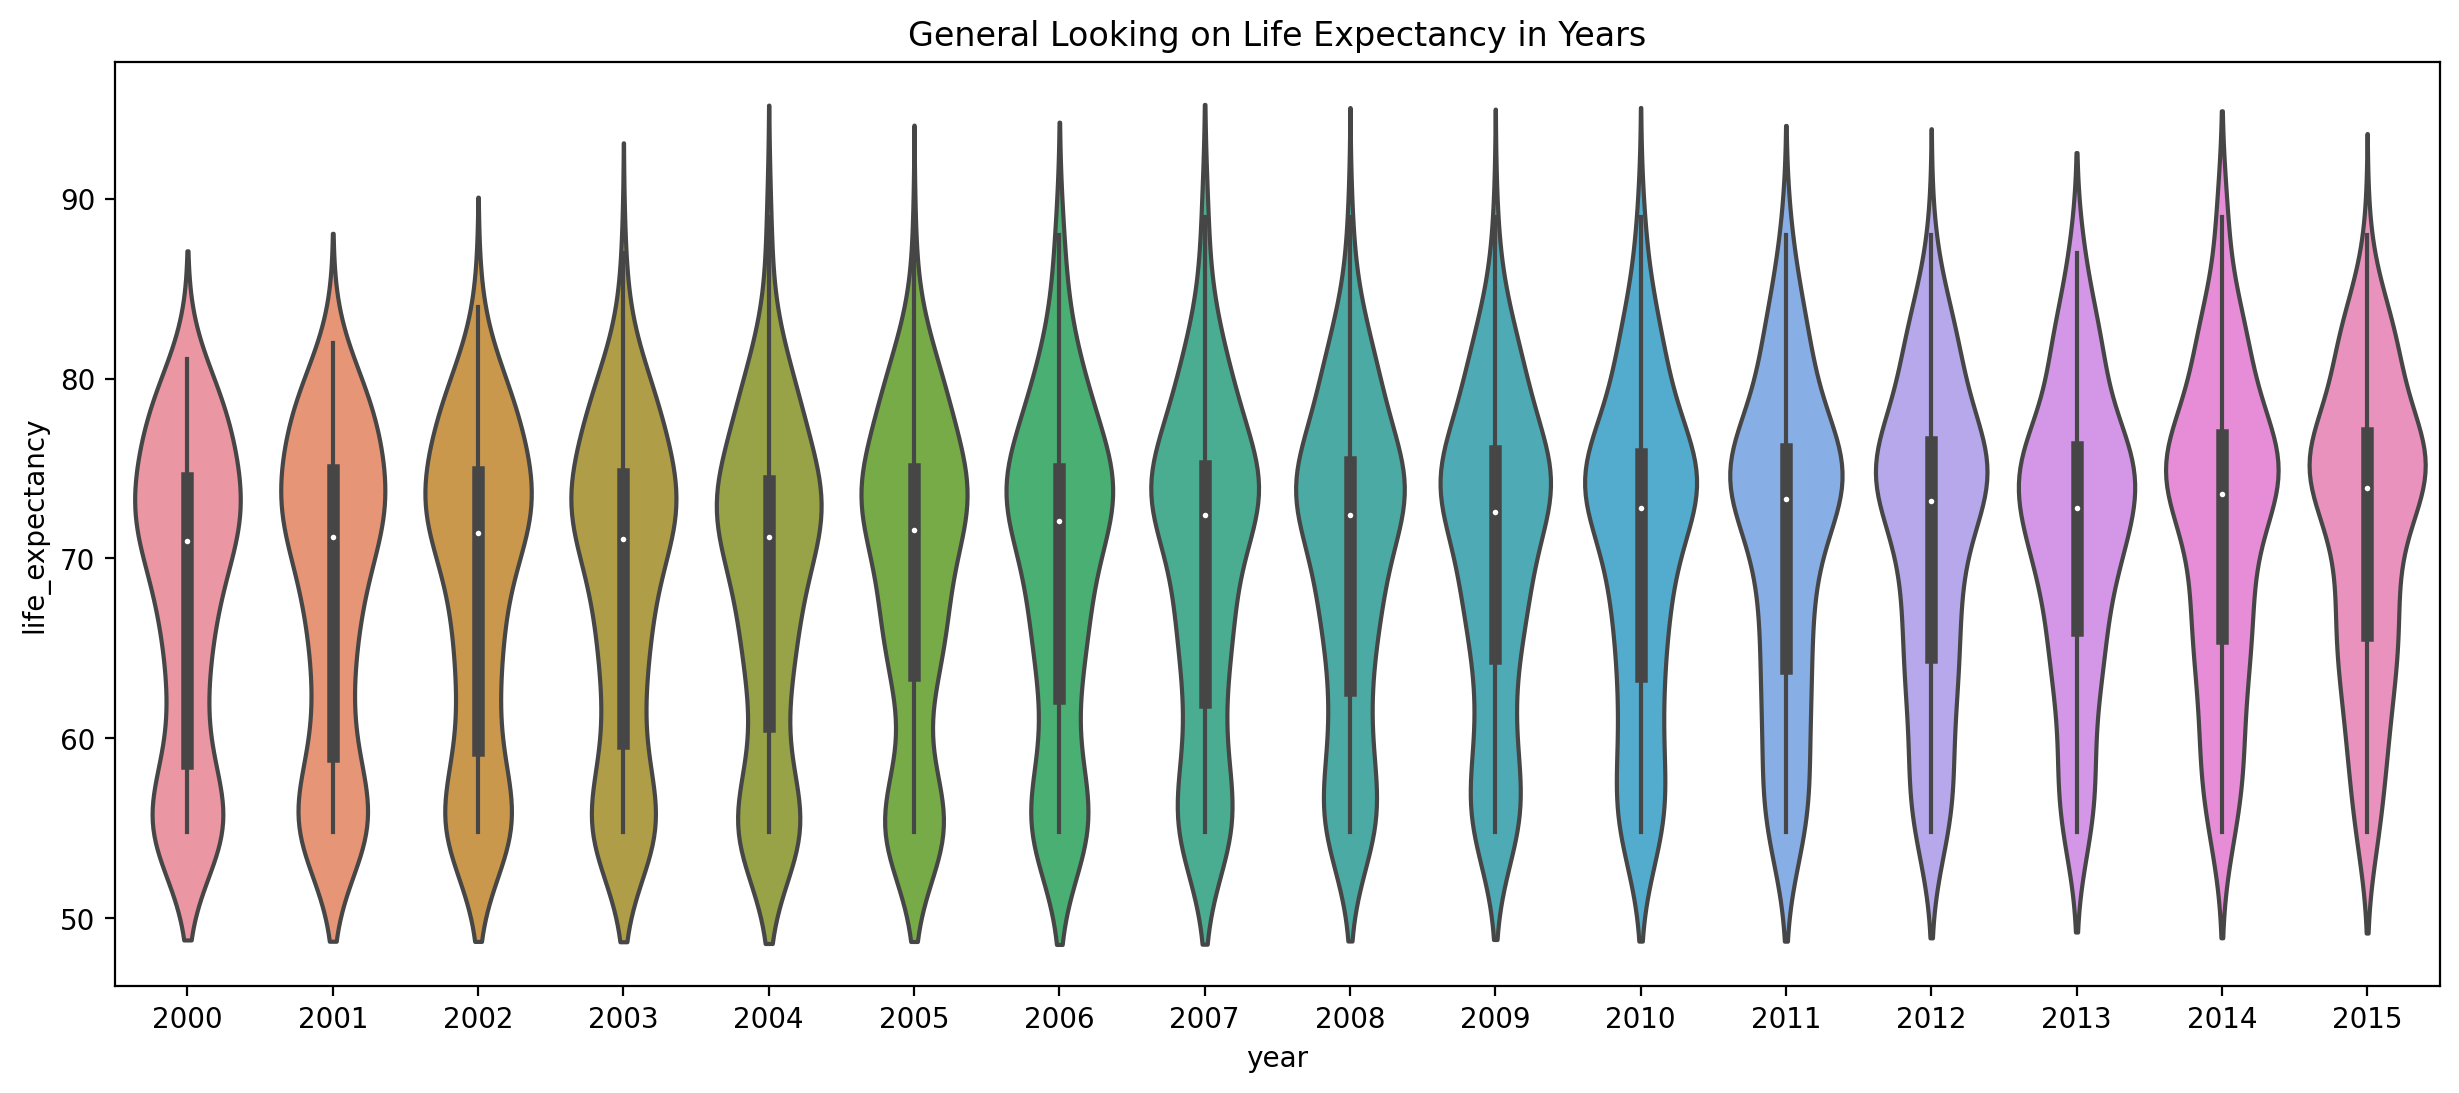

In [33]:
#in years
plt.figure(figsize=(15,6), dpi=200)
sns.violinplot(data=wins_df, x='year', y='life_expectancy')
plt.title('General Looking on Life Expectancy in Years')
plt.show()

##### <b>General looking on life expectancy values based on regions and years<b>

In [44]:
path = 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv'
regions_df = pd.read_csv(path)

In [45]:
regions_df.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [46]:
regions_df[regions_df.region.isna()]

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
8,Antarctica,AQ,ATA,10,ISO 3166-2:AQ,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# delete a record where there is no data for region
regions_df.drop(regions_df[regions_df.region.isna()].index, inplace=True)

In [48]:
# check whether there is any unmatch between country column and 
countries = list(regions_df.name.unique())
for country in list(wins_df.country.unique()):
    if country not in countries:
        print(country)

Democratic People's Republic of Korea
Democratic Republic of the Congo
Republic of Korea
Republic of Moldova
Swaziland
The former Yugoslav republic of Macedonia
United Republic of Tanzania


In [49]:
regions_df['name'] = regions_df['name'].replace(["Korea (Democratic People's Republic of)", 
                                                 'Congo, Democratic Republic of the',
                                                "Korea, Republic of", 
                                                 "Moldova, Republic of",
                                                 "Eswatini",
                                                 "North Macedonia",
                                                 "Tanzania, United Republic of"
                                                ],["Democratic People's Republic of Korea",
                                                 'Democratic Republic of the Congo',
                                                 'Republic of Korea',
                                                 'Republic of Moldova',
                                                 'Swaziland',
                                                 'The former Yugoslav republic of Macedonia',
                                                 'United Republic of Tanzania'
                                                ])

In [50]:
# combine those two dataframes so as to perform an analysis at regional level
merged_df = pd.merge(wins_df, regions_df[['name', 'region']], left_on='country', right_on='name', how='outer')

In [51]:
merged_df['region'].isna().sum()

0

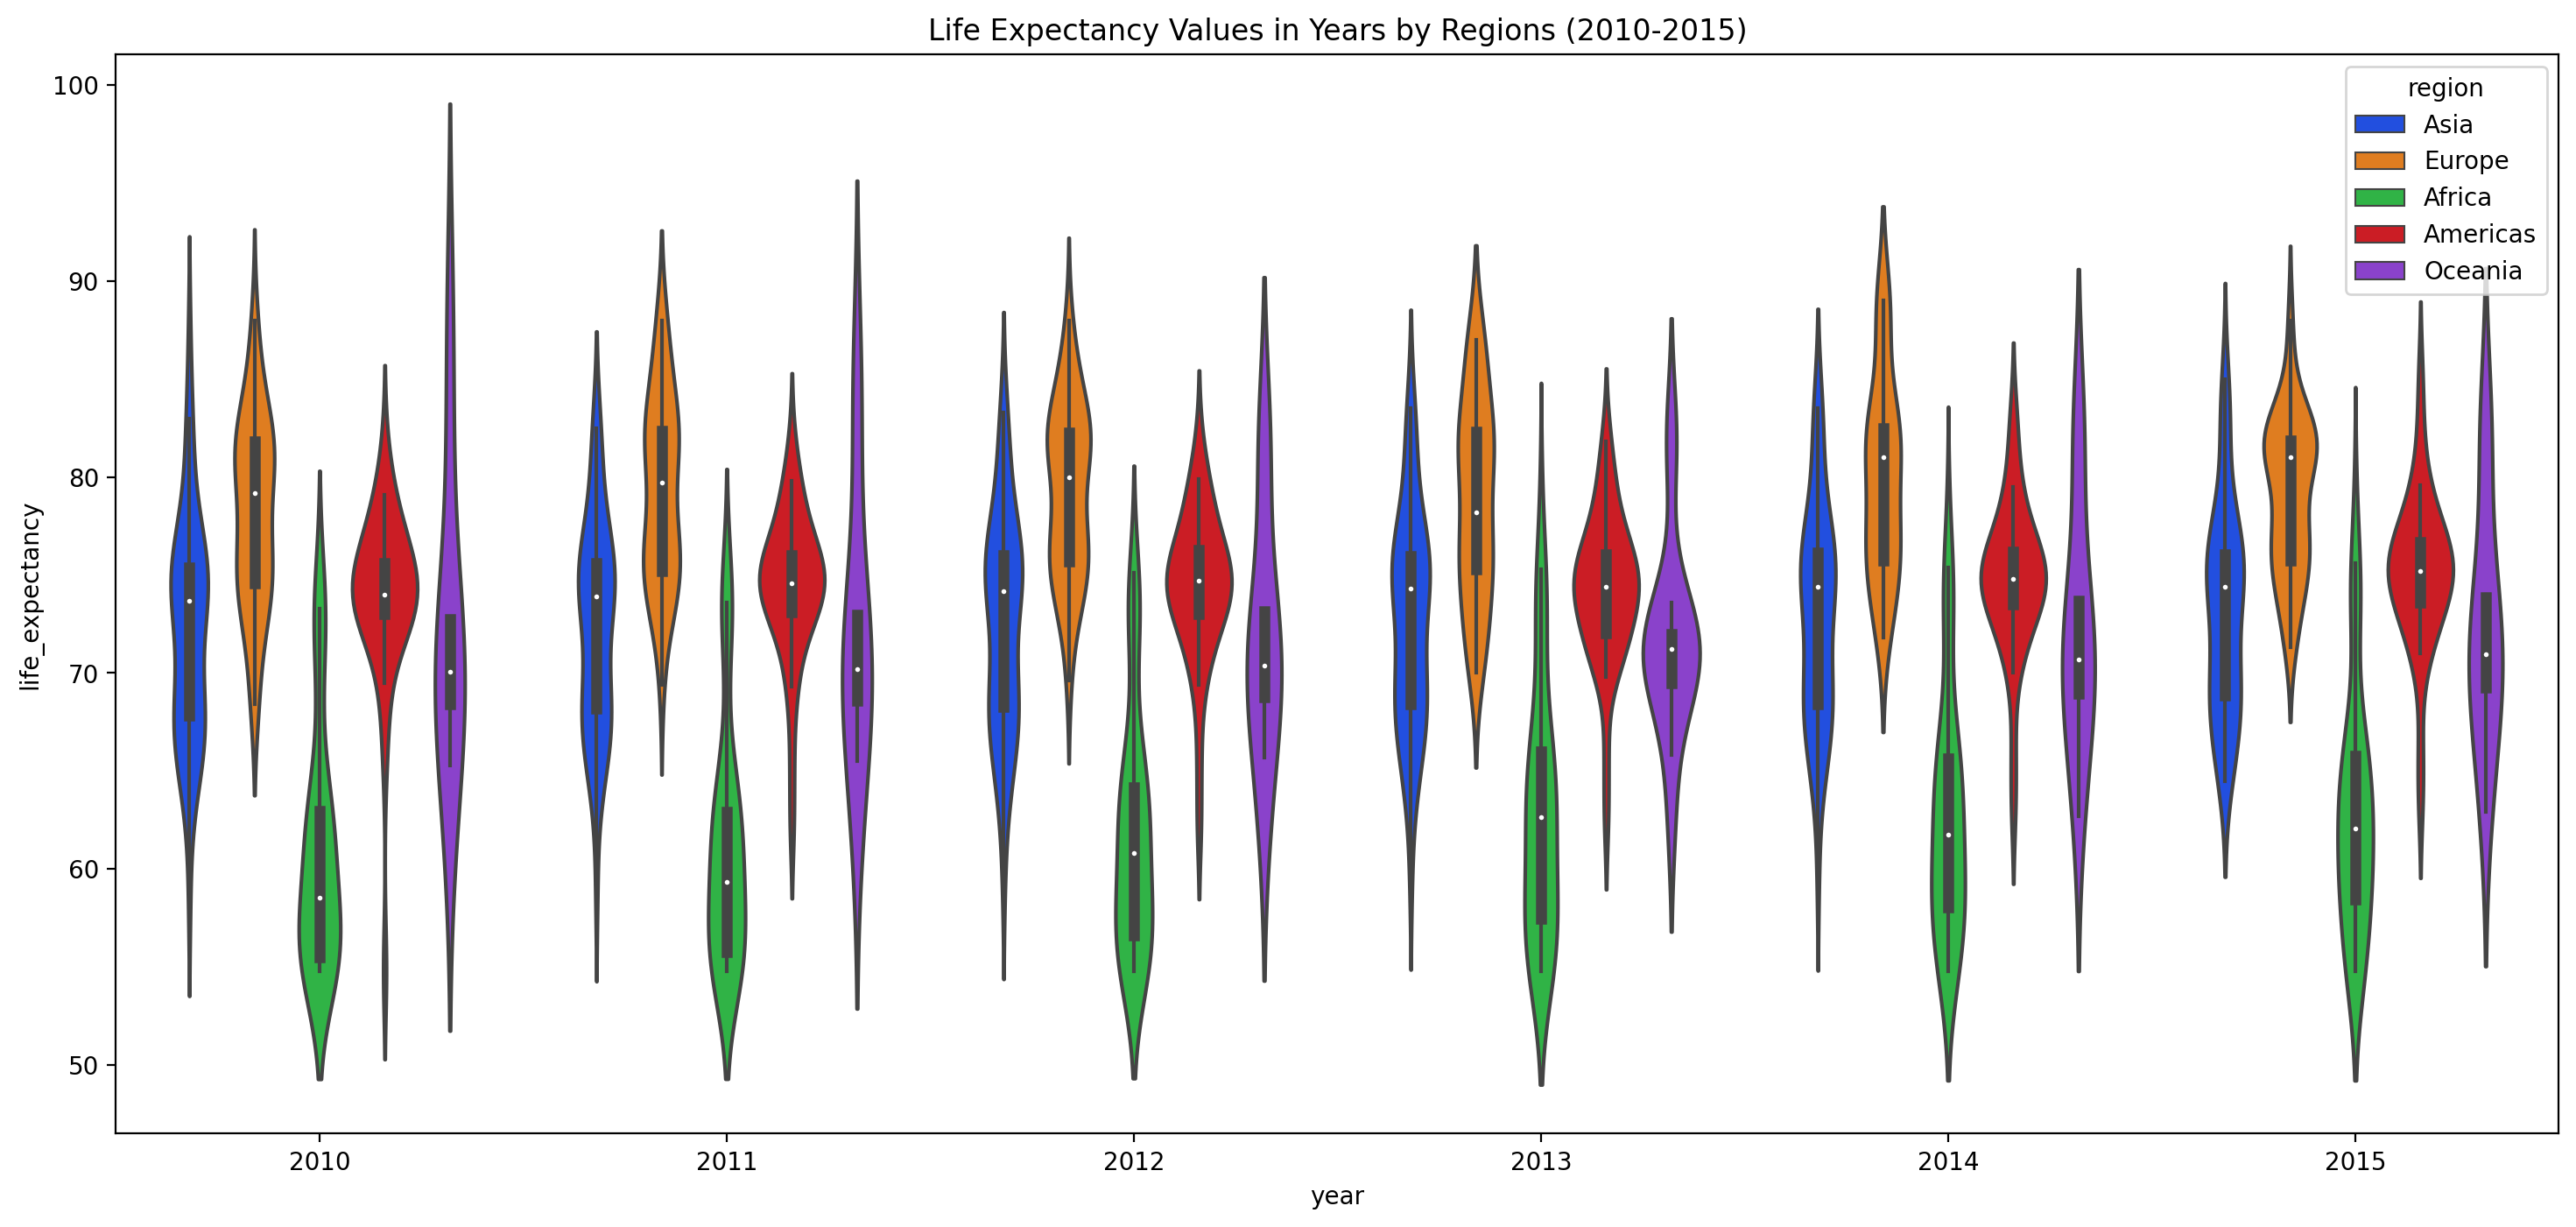

In [55]:
plt.figure(figsize=(18,8), dpi=200)
sns.violinplot(x=merged_df.loc[merged_df.year > 2009]['year'].astype(int), 
               y='life_expectancy', 
               hue='region', 
               data=merged_df, palette='bright')
plt.title("Life Expectancy Values in Years by Regions (2010-2015)")
plt.savefig("[15]_violin_year_by_region.png", bbox_inches='tight')
plt.show()

We can observe that people in Europe, Americas and Asia have a stable life expectancy in general while there is a decrease in life expectancy for the first three years but goes up in the following years for people in Oceania.
For people in Africa, It seems like more and more people have longer life expectancy by taking the change of the width (frequencies) of the graph into account.

# Part 2 - Building Machine Learning Model

In [69]:
#import necessary libraries for this part
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from statsmodels.tools.eval_measures import mse, rmse

In [70]:
df = wins_df

In [71]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.000000,0.010000,71.279624,65.0,831,...,52.0,8.16,65.0,0.1,584.259210,2.865628e+07,15.3,15.5,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,35.129032,4.600000,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21.000000,5.288333,0.000000,95.0,63,...,95.0,7.08,95.0,0.1,4132.762920,2.865628e+07,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,54.8,335.0,66.000000,5.288333,0.000000,64.0,118,...,52.0,7.08,64.0,1.8,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,35.129032,5.288333,0.000000,99.0,0,...,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9
